In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
from scipy import stats

# Importing Scikit-learn Boston Housing Data

In [2]:
housing_data = load_boston()

In [3]:
print(housing_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
housing_df = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
housing_df['MEDV'] = housing_data.target
housing_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [5]:
housing_df = housing_df.rename(columns={"CRIM": "Crime", "ZN": "Zone_Proportion", "INDUS": "Non_Retail_Proportion",
                                      "CHAS": "Charles_River", "NOX": "Nitric_Oxide", 
                                      "RM": "Average_Room", "AGE": "Unit_Age",
                                        "DIS": "Distance_To_Centre",
                                         "RAD": "Highway_Access_Index",
                                         "TAX": "Property_Tax_Rate",
                                         "PTRATIO": "Pupil_Teacher_Ratio",
                                        "B": "Blacks_By_Town",
                                        "LSTAT": "Lower_Status",
                                        "MEDV": "Median_Home_Value"})

# Histograms for Variables

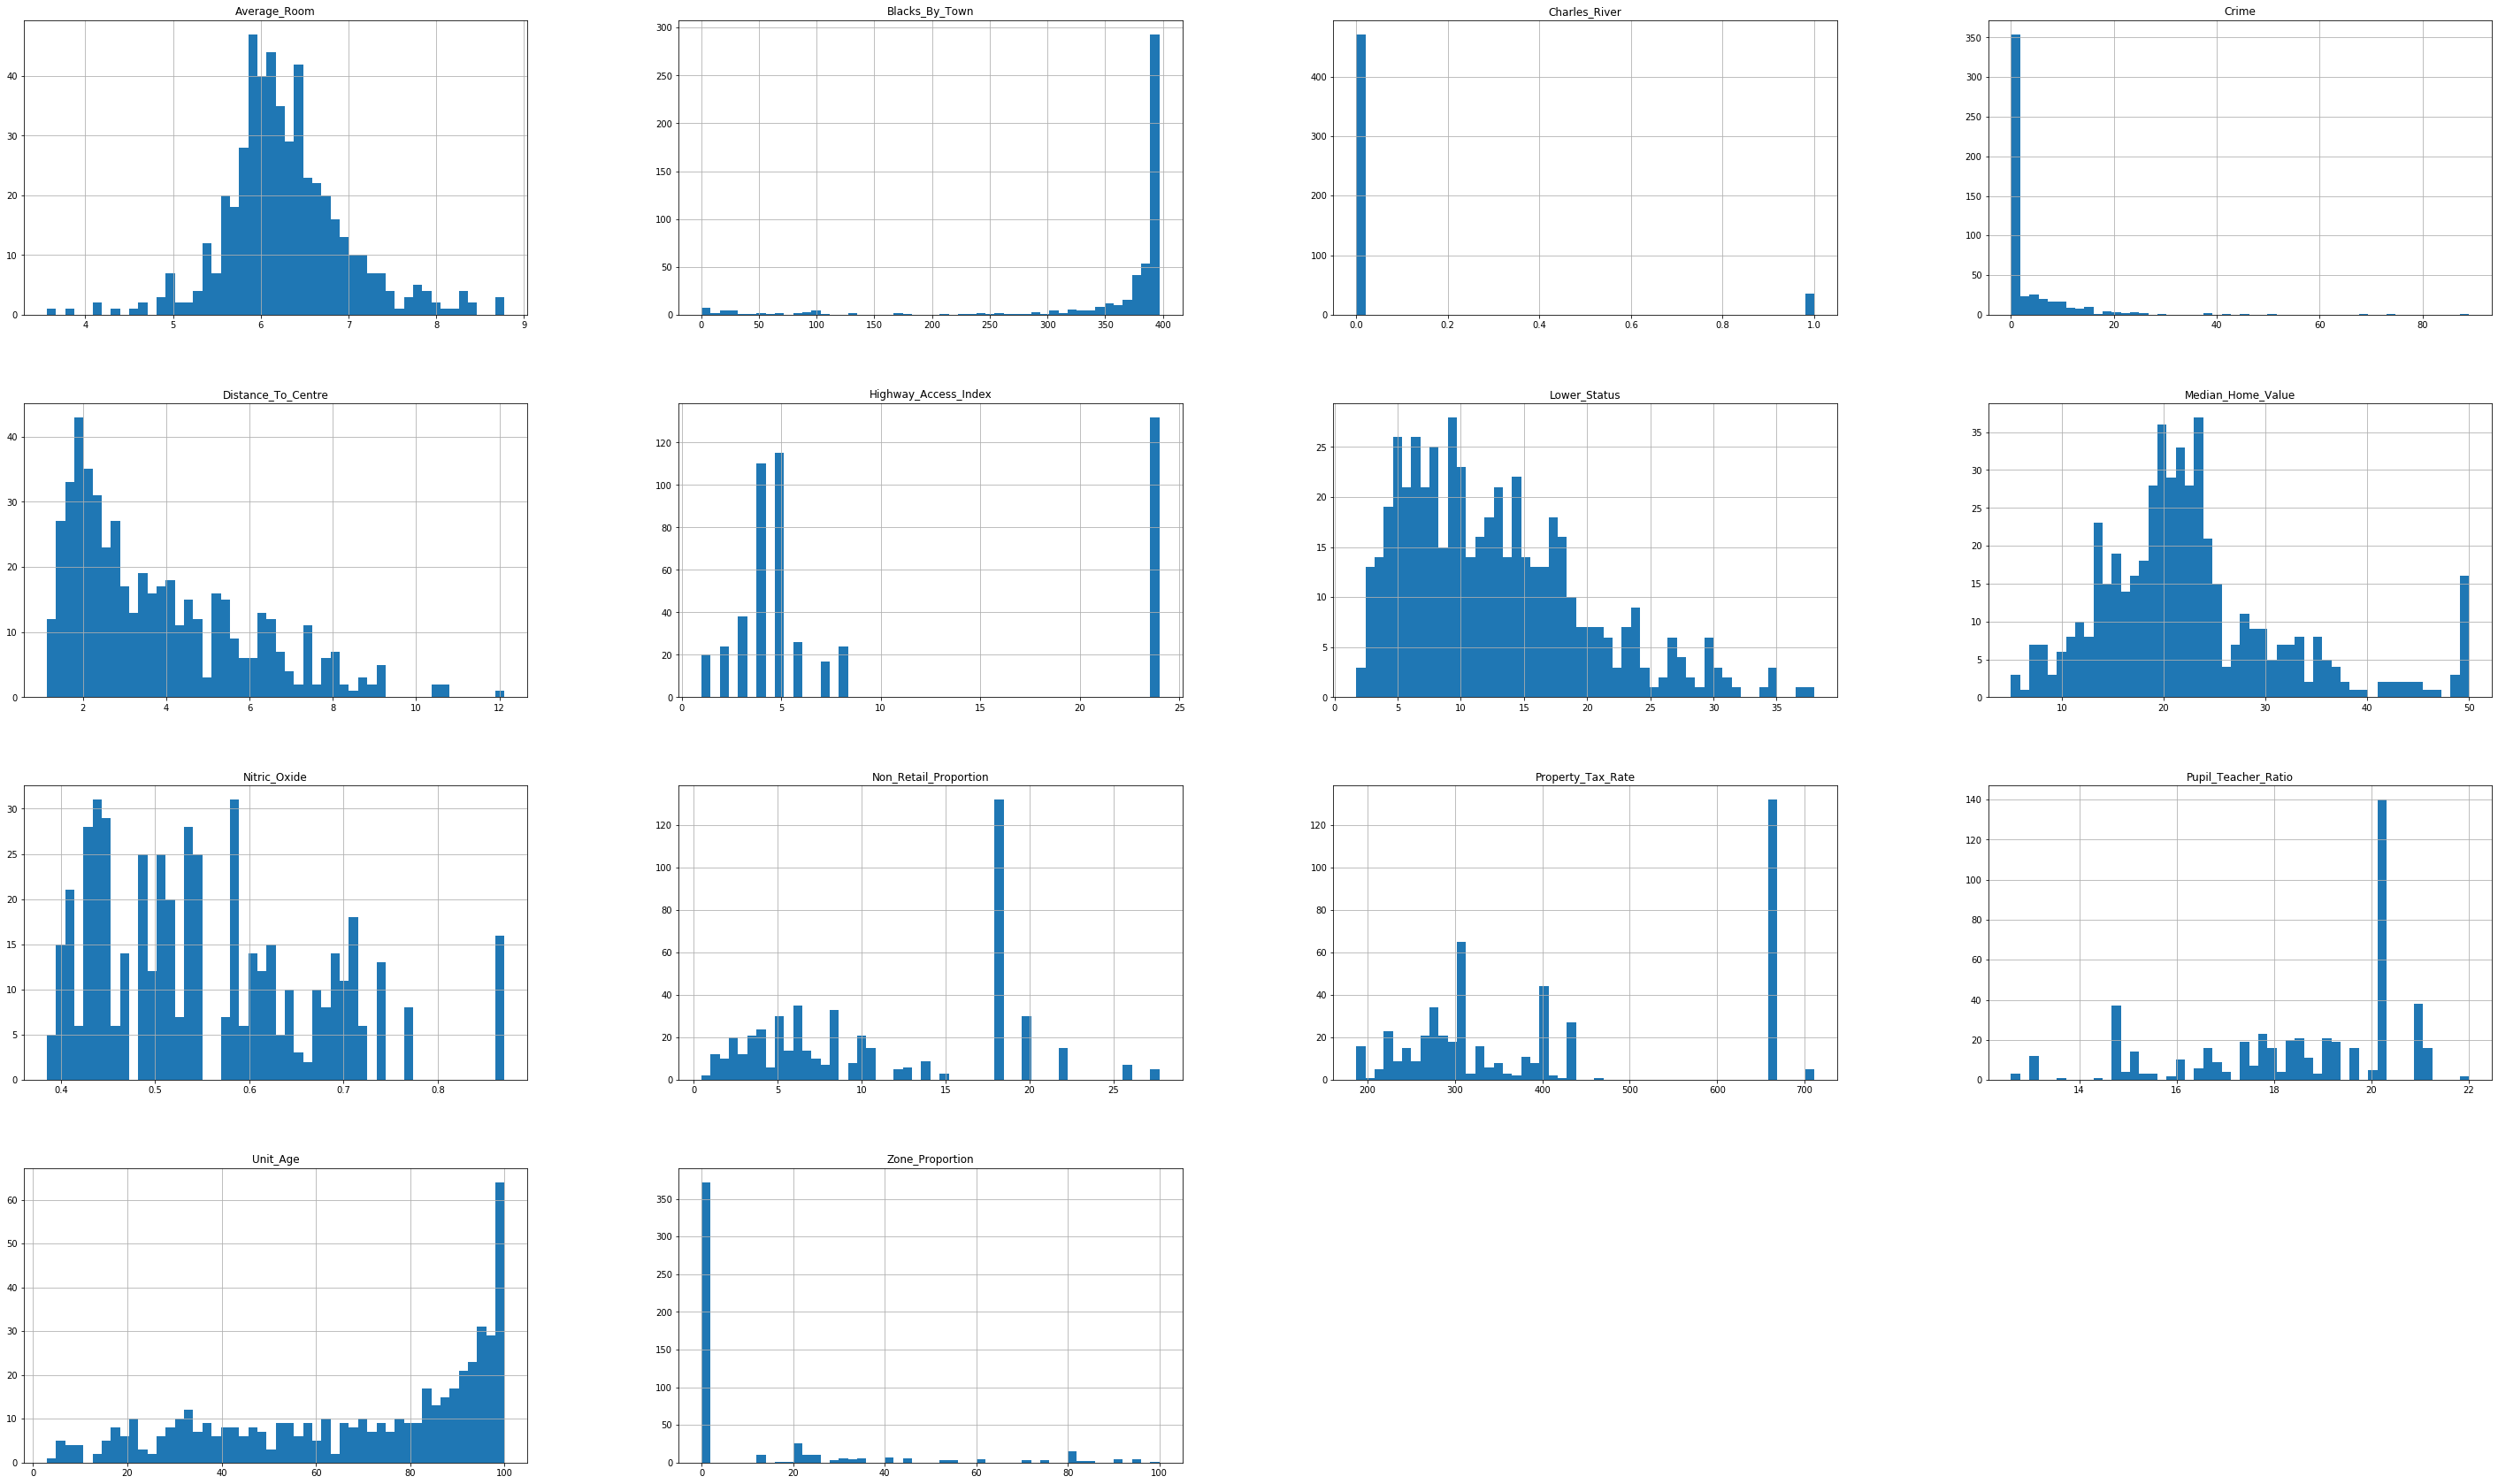

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(50,30))
plt.show()

# Scatter Matrix

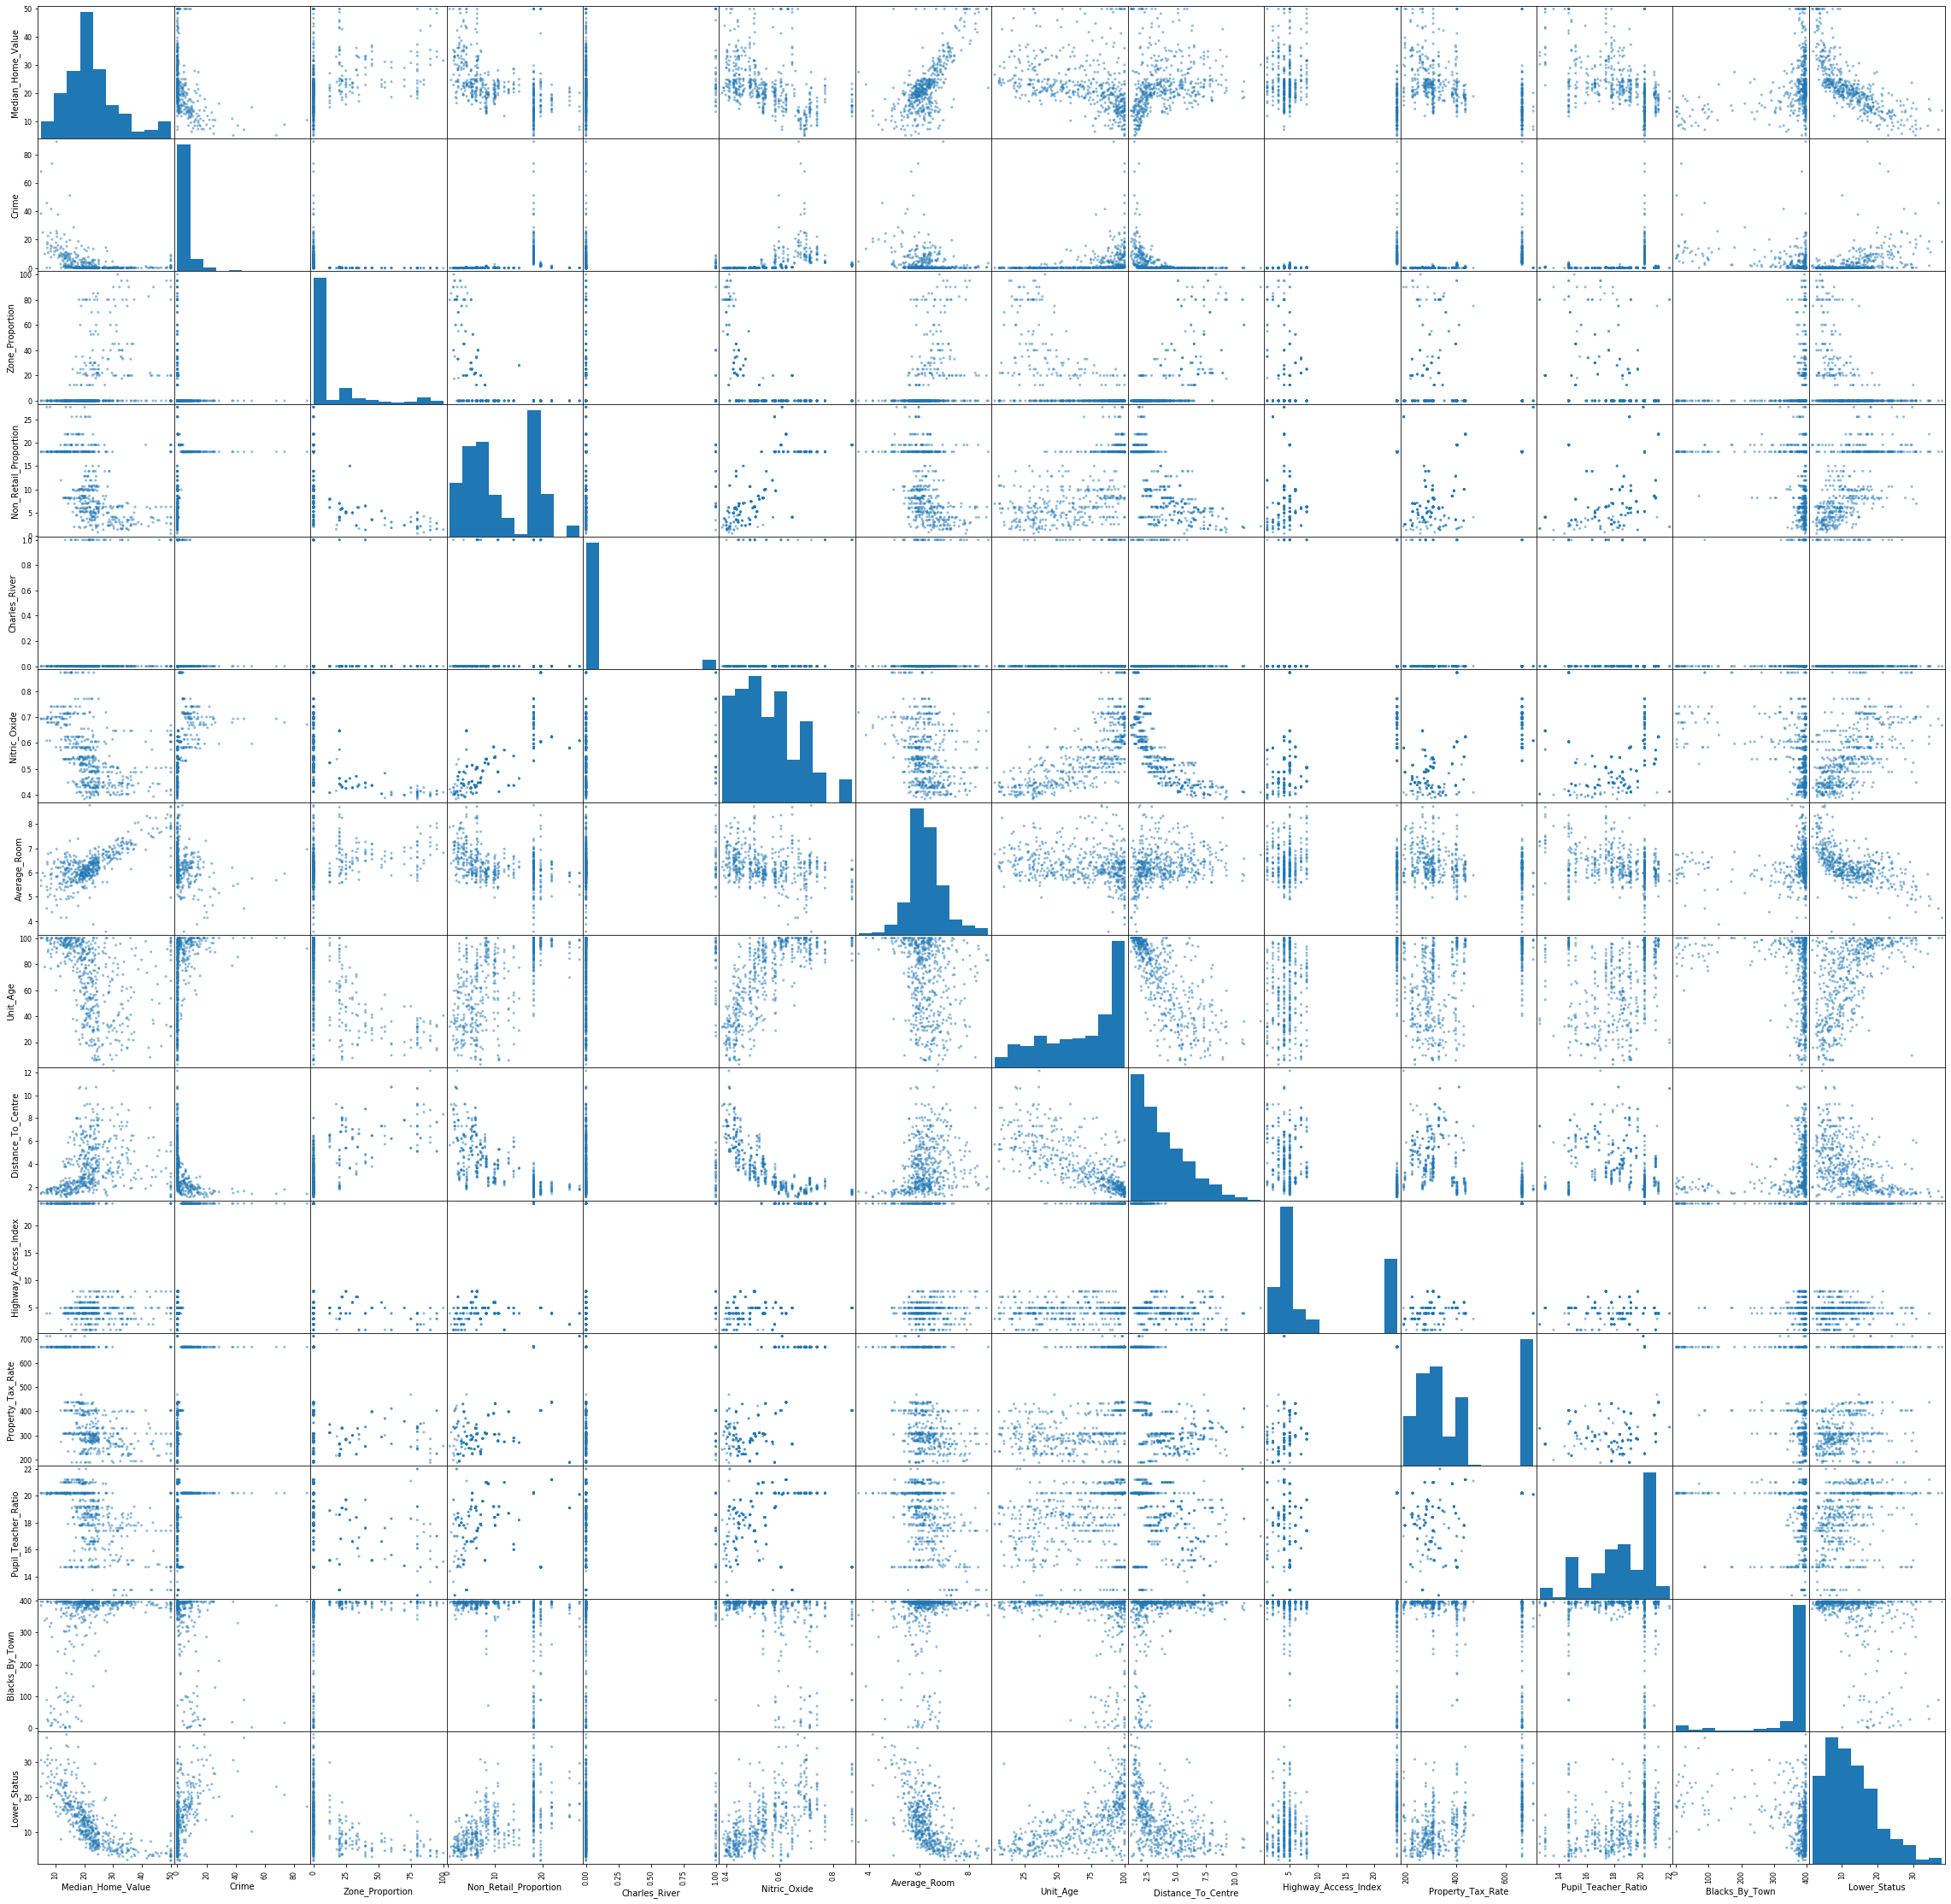

In [15]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
attributes = ["Median_Home_Value", "Crime", "Zone_Proportion", "Non_Retail_Proportion", "Charles_River", 
              "Nitric_Oxide", "Average_Room", "Unit_Age", "Distance_To_Centre", "Highway_Access_Index",
              "Property_Tax_Rate", "Pupil_Teacher_Ratio", "Blacks_By_Town", "Lower_Status"]     
             
scatter_matrix(housing_df[attributes], figsize=(40, 40));

Text(0.5, 1.0, 'Proportion of Non-Retail Business Acres per Town')

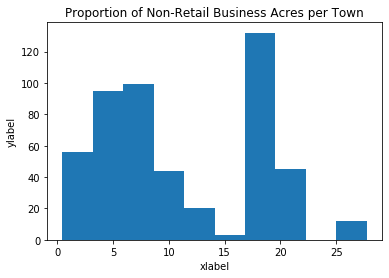

In [9]:
# Proportion of Non-Retail Business Acres per Town - Histogram
plt.hist(housing_df['Non_Retail_Proportion'])
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Proportion of Non-Retail Business Acres per Town')

Text(0.5, 1.0, 'Log Transformation: Proportion of Non-Retail Business Acres per Town')

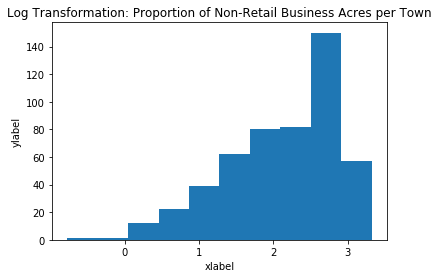

In [10]:
# Proportion of Non-Retail Business Acres per Town - Log Transformation
plt.hist(np.log(housing_df['Non_Retail_Proportion']))
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Log Transformation: Proportion of Non-Retail Business Acres per Town')

Text(0.5, 1.0, 'Proportion of Non-Retail Business Acres per Town v. Median Home Value')

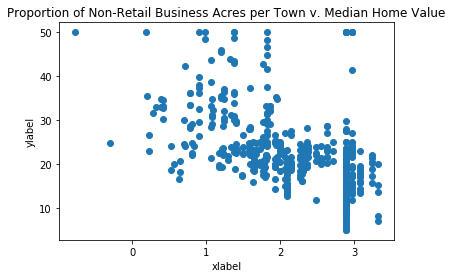

In [11]:
# Proportion of Non-Retail Business Acres per Town - Log Transformation
plt.scatter(np.log(housing_df['Non_Retail_Proportion']),housing_df["Median_Home_Value"])
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Proportion of Non-Retail Business Acres per Town v. Median Home Value')

# Variables

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's)

# Scatter Plot  - Crime, Zone Proportion, and Non-Retail Proportion

Crime = crime per capita crime rate by town
Zone_Proportion = proportion of residential land zoned for lots over 25,000 sq.ft.
Non_Retail_Proportion = proportion of non-retail business acres per town


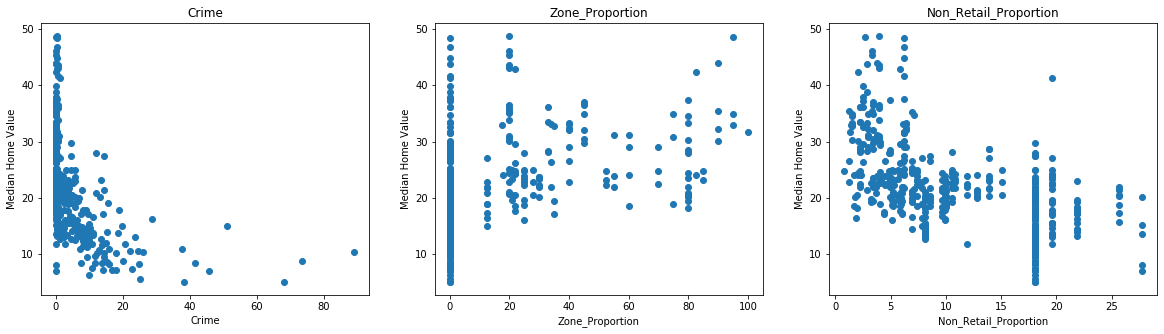

In [17]:
plt.figure(figsize=(20, 5))

features = ['Crime', 'Zone_Proportion', 'Non_Retail_Proportion']
# target = housing_df['Median_Home_Value']

# removed rows with medv >= 50.0
removed_medv_df = housing_df[~(housing_df['Median_Home_Value'] >= 50.0)]
target = removed_medv_df['Median_Home_Value']

print('Crime = crime per capita crime rate by town')
print('Zone_Proportion = proportion of residential land zoned for lots over 25,000 sq.ft.')
print('Non_Retail_Proportion = proportion of non-retail business acres per town')

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = removed_medv_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Median Home Value')

# Box & Whisker Plot

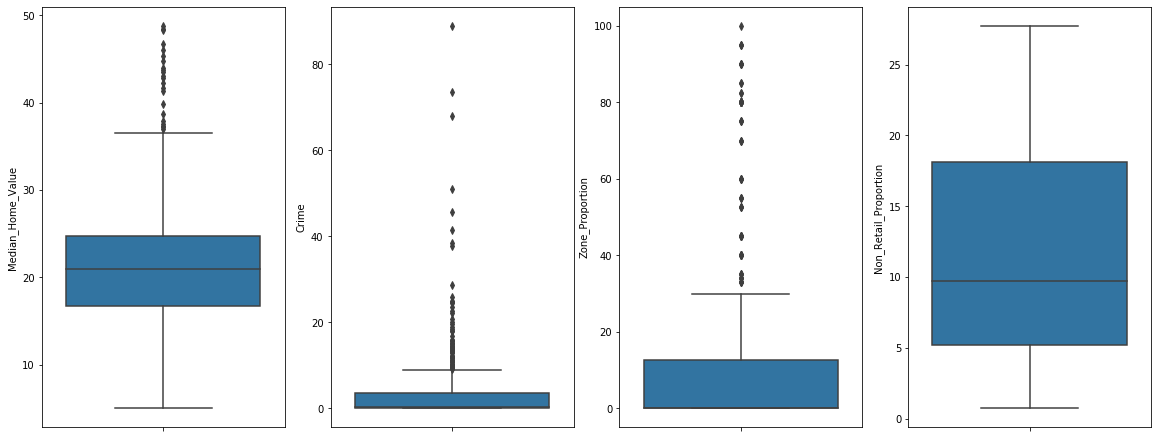

In [21]:
data = removed_medv_df[['Median_Home_Value','Crime', 'Zone_Proportion', 'Non_Retail_Proportion']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 6))
index = 0
axs = axs.flatten()

for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Plots using Seaborn 

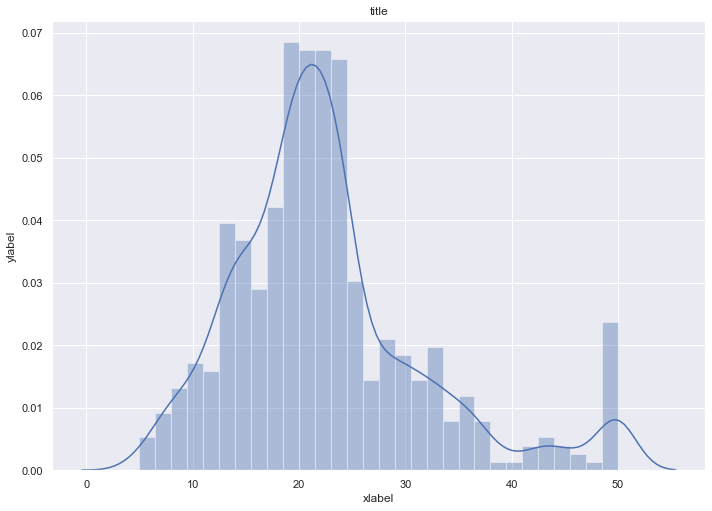

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing_df['Median_Home_Value'], bins=30)
plt.title('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

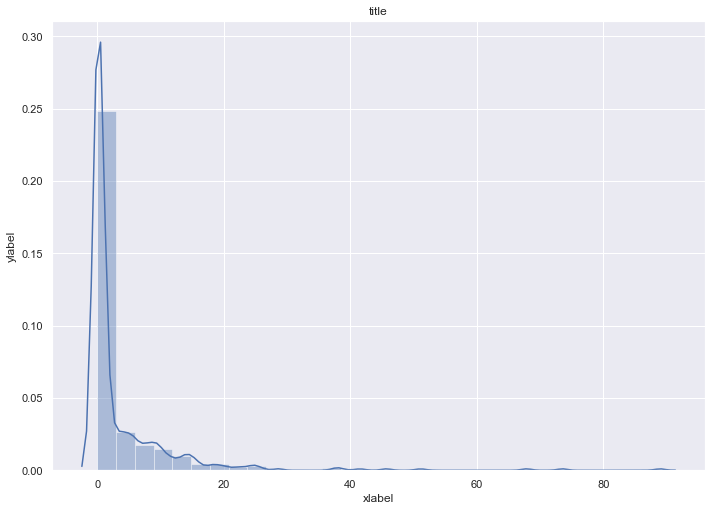

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing_df['Crime'], bins=30)
plt.title('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

# Train Test Split

In [24]:
x = pd.DataFrame(np.c_[housing_df['Crime']], columns = ['Crime'])
y = housing_df['Median_Home_Value']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

print("Train Test Splits:")
print('-----------------')
print(f'x_train:{x_train.shape}')
print(f'x_test:{x_test.shape}')
print('-----------------')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

Train Test Splits:
-----------------
x_train:(404, 1)
x_test:(102, 1)
-----------------
y_train:(404,)
y_test:(102,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R^2 (coefficient of determination) regression score function.
Best possible score is 1.0 and it can be negative

Root Mean Square Error (RMSE) measures how much error there is between two data sets. In other words, it compares a predicted value and an observed or known value

In [26]:
# Decision Tree Regressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = housing_df.iloc[:,:13]
target = housing_df['Median_Home_Value']

# data = removed_medv_df[['crime', 'Zone_Proportion', 'Proportion_of_Non-Retail']]

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6765225090967621

In [27]:
feature_importances = clf.feature_importances_
sorted(zip(housing_df, feature_importances), reverse=True)

[('Zone_Proportion', 0.0013958973656146804),
 ('Unit_Age', 0.015238412377466662),
 ('Pupil_Teacher_Ratio', 0.014499480028969471),
 ('Property_Tax_Rate', 0.0041924186973458155),
 ('Non_Retail_Proportion', 0.007809744248717516),
 ('Nitric_Oxide', 0.006548973228815344),
 ('Lower_Status', 0.22176583760447333),
 ('Highway_Access_Index', 0.0012527292357462686),
 ('Distance_To_Centre', 0.07446988245830276),
 ('Crime', 0.054842526859217484),
 ('Charles_River', 0.0002084177798905089),
 ('Blacks_By_Town', 0.009158229040184287),
 ('Average_Room', 0.5886174510752559)]

In [28]:
updated_df = housing_df[['Average_Room','Lower_Status','Distance_To_Centre','Crime','Pupil_Teacher_Ratio',
                         'Unit_Age','Non_Retail_Proportion']]

In [29]:
# Decision Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = updated_df
target = housing_df['Median_Home_Value']

# train fold, k-fold
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)
clf = tree.DecisionTreeRegressor()

# clf.score(X_test, y_test) # versus the mean square error
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [30]:
mean_squared_error(predictions, y_test)

15.725590551181103

In [31]:
predictions = clf.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
173        22.0    23.6
274        33.1    32.4
491        17.3    13.6
72         24.1    22.8
452        16.8    16.1
..          ...     ...
418         5.0     8.8
117        21.2    19.2
42         24.1    25.3
322        23.1    20.4
347        28.7    23.1

[127 rows x 2 columns]

In [33]:
data = np.log(housing_df['Non_Retail_Proportion'])
target = housing_df['Median_Home_Value']

# train fold, k-fold

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
clf_score = clf.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))
print(f'DecisionTreeRegressor Score: {clf_score}')

DecisionTreeRegressor Score: 0.4483038451207807


In [34]:
import numpy as np
from sklearn.model_selection import KFold

x = updated_df
y = housing_df['Median_Home_Value']
kf = KFold(n_splits=2)
kf.get_n_splits(x)

KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index)
    print('-------------------------------------------------------------------------')
    print("TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497

KeyError: "None of [Int64Index([253, 254, 255, 256, 257, 258, 259, 260, 261, 262,\n            ...\n            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],\n           dtype='int64', length=253)] are in the [columns]"

In [35]:
housing_df.iloc[:,:13]

Crime  Zone_Proportion  Non_Retail_Proportion  Charles_River  \
0    0.00632             18.0                   2.31            0.0   
1    0.02731              0.0                   7.07            0.0   
2    0.02729              0.0                   7.07            0.0   
3    0.03237              0.0                   2.18            0.0   
4    0.06905              0.0                   2.18            0.0   
..       ...              ...                    ...            ...   
501  0.06263              0.0                  11.93            0.0   
502  0.04527              0.0                  11.93            0.0   
503  0.06076              0.0                  11.93            0.0   
504  0.10959              0.0                  11.93            0.0   
505  0.04741              0.0                  11.93            0.0   

     Nitric_Oxide  Average_Room  Unit_Age  Distance_To_Centre  \
0           0.538         6.575      65.2              4.0900   
1           0.469         6.421      78.9              4.9671   
2           0.469         7.185      61.1              4.9671   
3           0.458         6.998      45.8              6.0622   
4           0.458         7.147      54.2              6.0622   
..            ...           ...       ...                 ...   
501         0.573         6.593      69.1              2.4786   
502         0.573         6.120      76.7              2.2875   
503         0.573         6.976      91.0              2.1675   
504         0.573         6.794      89.3              2.3889   
505         0.573         6.030      80.8              2.5050   

     Highway_Access_Index  Property_Tax_Rate  Pupil_Teacher_Ratio  \
0                     1.0              296.0                 15.3   
1                     2.0              242.0                 17.8   
2                     2.0              242.0                 17.8   
3                     3.0              222.0                 18.7   
4                     3.0              222.0                 18.7   
..                    ...                ...                  ...   
501                   1.0              273.0                 21.0   
502                   1.0              273.0                 21.0   
503                   1.0              273.0                 21.0   
504                   1.0              273.0                 21.0   
505                   1.0              273.0                 21.0   

     Blacks_By_Town  Lower_Status  
0            396.90          4.98  
1            396.90          9.14  
2            392.83          4.03  
3            394.63          2.94  
4            396.90          5.33  
..              ...           ...  
501          391.99          9.67  
502          396.90          9.08  
503          396.90          5.64  
504          393.45          6.48  
505          396.90          7.88  

[506 rows x 13 columns]

# Training vs. Testing Data

(490, 3) (490, 1)


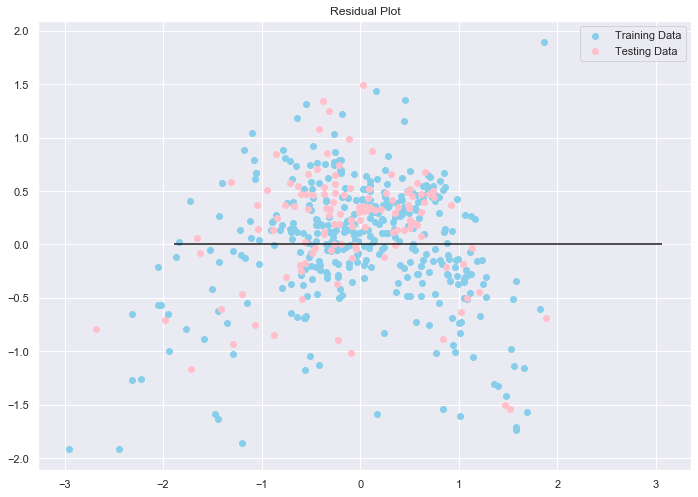

In [38]:
x = removed_medv_df[['Average_Room','Lower_Status','Unit_Age']]
y = removed_medv_df['Median_Home_Value'].values.reshape(-1, 1)
print(x.shape, y.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="skyblue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(x_test_scaled, y_test_scaled)

### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3018602032941721, R2: 0.617520614457298


# Lasso Model

In [43]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = lasso.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(x_test_scaled, y_test_scaled)

### END SOLUTION
print("Lasso Model:")
print(f"MSE: {MSE}, R2: {r2}")

Lasso Model:
MSE: 0.30225815257247324, R2: 0.6166376899790451


# Ridge Model

In [44]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = ridge.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(x_test_scaled, y_test_scaled)
### END SOLUTION
print("Ridge Model:")
print(f"MSE: {MSE}, R2: {r2}")

Ridge Model:
MSE: 0.30156183876730325, R2: 0.6175208438876413


# ElasticNet Model

In [45]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = elasticnet.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(x_test_scaled, y_test_scaled)
### END SOLUTION
print("ElasticNet Model:")
print(f"MSE: {MSE}, R2: {r2}")

ElasticNet Model:
MSE: 0.3018602032941721, R2: 0.6171424199699561


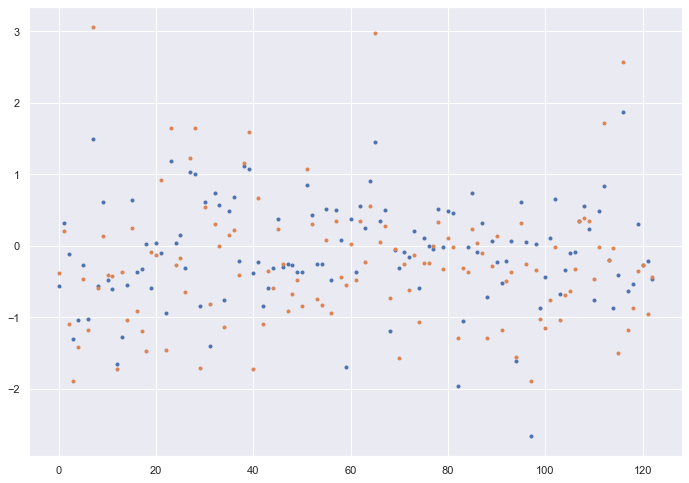

In [46]:
plt.plot(predictions,".")
plt.plot(y_test_scaled,".")

In [49]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
import sklearn

from sklearn.ensemble import RandomForestRegressor

models = [Ridge(), ElasticNet(), Lasso(), LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    print(model)  
    print(f'Model Score =', np.mean(cross_val_score(model, x_train, y_train, cv=3, scoring='neg_mean_squared_error')))
    print('----------------------------------------------------------------------------------')

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Model Score = -22.980822850135166
----------------------------------------------------------------------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Model Score = -25.56002431618849
----------------------------------------------------------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Model Score = -25.545117599123884
----------------------------------------------------------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Model Score = 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

In [50]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [51]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# max_leaf_nodes set to smaller numbers

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
from sklearn.ensemble import RandomForestRegressor

### BEGIN SOLUTION
rfr = RandomForestRegressor(max_depth=3).fit(x_train_scaled, y_train_scaled)

trainedPredictions = rfr.predict(x_train_scaled)
testPredictions = rfr.predict(x_test_scaled)

MSEtrain = mean_squared_error(trainedPredictions, y_train_scaled)
MSEtest = mean_squared_error(testPredictions, y_test_scaled)

print(f"MSEtrain: {MSEtrain}, MSEtest: {MSEtest}")

# r2 = RandomForestRegressor.score(X_test_scaled, y_test_scaled)
### END SOLUTION


MSEtrain: 0.16724765336239186, MSEtest: 0.1933881925194037


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


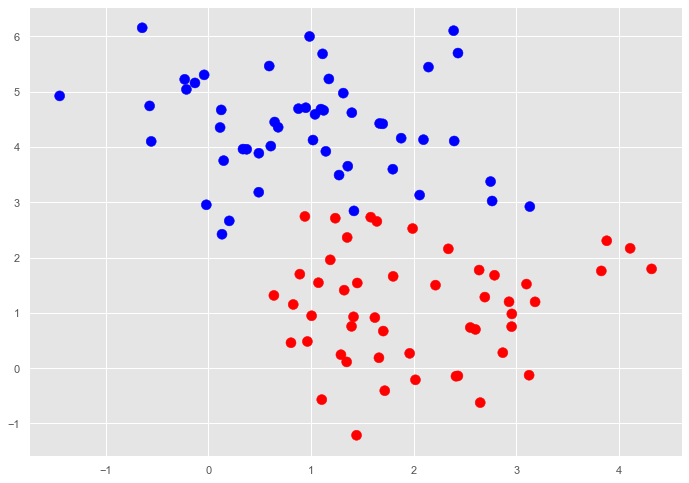

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.885, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.840, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.958, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.885, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.840, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.958, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ...........

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

# List the best parameters for this dataset
print(grid.best_params_)

# List the best score
print(grid.best_score_)

# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))